In [ ]:
ta

# Proyecto Final Grandes Datos

El Procesamiento de Lenguaje Natural tiene diversas aplicaciones, dos de ellas son: la clasificación del texto o categorización y el análisis de sentimiento, en este proyecto aplicarás ambas para realizar lo que más adelante se te pide.

Importación de las librerias a usar.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc("font", size=30)
plt.rcParams['figure.figsize'] = (11,7)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

import re
import nltk
import numpy as np
import pandas as pd


%matplotlib inline
import re
import os
import sys
import ast
plt.style.use('fivethirtyeight')

nltk.download('punkt')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from datetime import datetime, timezone
#import datetime
import warnings
warnings.simplefilter(action='ignore')

from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package punkt to C:\Users\Anony-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Anony-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
Comments_df = pd.read_csv (r'Comments.csv')
Comments_df

,A1,A2,A3,A4,A5,A6,A7,A8,A9
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


Se renombran las columnas para que sea más fácil el manejo de la información:
1. A1: ID del renglón
2. A2: ID del producto
3. A3: ID de usuario
4. A4: Alias del usuario
5. A5: Número de usuarios que consideraron útil la opinión
6. A6: Un rating entre 1 y 5
7. A7: La hora de registro (timestamp)
8. A8: El título del review
9. A9: El texto del review

In [ ]:
Comments_df.columns = ['ID_row', 'ID_product', 'ID_user','User_alias','Num_useful_users','Rating', 'Timestamp','Title_review','Text_review']
#Comments_df

In [ ]:
def Det_fulldate(i):
    dt_now = datetime.now(tz=timezone.utc)
    dt_ts = datetime.fromtimestamp(i, tz=timezone.utc)
    return dt_ts.isoformat()

In [ ]:
Comments_df['Reg_Time'] = Comments_df['Timestamp'].apply(Det_fulldate)

In [ ]:
def Det_day_of_week(i):
    dt_now = datetime.now(tz=timezone.utc)
    dt_ts = datetime.fromtimestamp(i, tz=timezone.utc)
    return dt_ts.strftime("%A")

In [ ]:
Comments_df['Weekday'] = Comments_df['Timestamp'].apply(Det_day_of_week)

In [ ]:
def Hour_day(i):
    dt_now = datetime.now(tz=timezone.utc)
    dt_ts = datetime.fromtimestamp(i, tz=timezone.utc)
    return dt_ts.strftime("%H")

In [ ]:
Comments_df['daytime'] = Comments_df['Timestamp'].apply(Hour_day)

In [ ]:
Comments_df

,ID_row,ID_product,ID_user,User_alias,Num_useful_users,Rating,Timestamp,Title_review,Text_review,Reg_Time,Weekday,daytime
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011-04-27T00:00:00+00:00,Wednesday,00
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012-09-07T00:00:00+00:00,Friday,00
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,2008-08-18T00:00:00+00:00,Monday,00
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,2011-06-13T00:00:00+00:00,Monday,00
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,2012-10-21T00:00:00+00:00,Sunday,00
...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,2011-03-09T00:00:00+00:00,Wednesday,00
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,2012-03-09T00:00:00+00:00,Friday,00
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",2012-02-21T00:00:00+00:00,Tuesday,00
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,2012-03-13T00:00:00+00:00,Tuesday,00


In [ ]:
Comments_df.isnull().sum()

ID_row               0
ID_product           0
ID_user              0
User_alias          16
Num_useful_users     0
Rating               0
Timestamp            0
Title_review        27
Text_review          0
Reg_Time             0
Weekday              0
daytime              0
dtype: int64

Por lo que los comentarios faltantes se llenarán con N/A.

In [ ]:
Comments_df["Text_review"].fillna('N/A', inplace=True)

In [ ]:
Comments_df.isnull().sum()

ID_row               0
ID_product           0
ID_user              0
User_alias          16
Num_useful_users     0
Rating               0
Timestamp            0
Title_review        27
Text_review          0
Reg_Time             0
Weekday              0
daytime              0
dtype: int64

In [ ]:
Comments_df.to_csv('Comments-V2.csv', index=False)

A continuación se procederá a responder las preguntas de la proyecto final

## 1. ¿De cuántos usuarios hay opiniones?

Para resolver esta pregunta, se agrupo por la columna de usuario y se determinó la cantidad de elementos de la tabla. Es decir, se agruparon todos los usuarios diferentes, ya que un mismo usuario puede comentar más de una vez, y se contó la cantidad de ellos.

In [ ]:
len(Comments_df.groupby(['ID_user']).count())

256059

O bien, se puede aproximar de la siguiente manera.

In [ ]:
len(Comments_df['ID_user'].value_counts())

256059

## 2. ¿En qué día de la semana los usuarios suelen dejar su opinión?

Cantidad de datos por día de la semana
Thursday     87078
Wednesday    85994
Tuesday      85857
Monday       85363
Friday       79682
Sunday       72791
Saturday     71689
Name: Weekday, dtype: int64


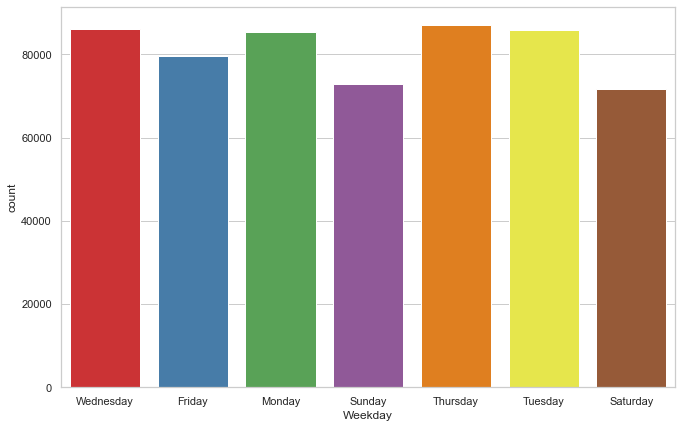

In [ ]:
print('Cantidad de datos por día de la semana')
print(Comments_df['Weekday'].value_counts())
sns.countplot(x='Weekday', data=Comments_df, palette='Set1')
plt.show()

## 3. ¿Cómo es la distribución de los ratings?, Es decir, cantidad de usuarios por cada rating.

Primero se vuelve a ajustar la tabla por los usuarios, ya que de no ser así existirá una duplicidad en los usuarios.

In [ ]:
dfNuevo = Comments_df[['ID_user', 'Rating']].copy()
dfNuevo.groupby(['Rating','ID_user']).count()

Empty DataFrame
Columns: []
Index: [(1, #oc-R10UA029WVWIUI), (1, #oc-R119LM8D59ZW8Y), (1, #oc-R11DNU2NBKQ23Z), (1, #oc-R120LO6OLNDPCG), (1, #oc-R12KPBODL2B5ZD), (1, #oc-R13NNUL4EKL4FL), (1, #oc-R14VLCY75KIBSB), (1, #oc-R14ZUK54VMOGJS), (1, #oc-R1522DF2LUL4G1), (1, #oc-R15343ZW0UTLMR), (1, #oc-R15OCG1KF51S4F), (1, #oc-R1669TSD0WO7EP), (1, #oc-R1791MZMDMM68R), (1, #oc-R18WQYZLWDZTSW), (1, #oc-R19TGMUT9ZUY0G), (1, #oc-R19W3DMF9X0I7C), (1, #oc-R1A1AOCIP53NOM), (1, #oc-R1AQH0RQMTL1Y9), (1, #oc-R1DRI2RP4P2TRV), (1, #oc-R1EDGHS9PF6P5L), (1, #oc-R1HCNLIP7REOF2), (1, #oc-R1HM2SQ1WTDKM1), (1, #oc-R1ICFZ7CRFKA5N), (1, #oc-R1J5M6S2EUERD4), (1, #oc-R1K507Q6XH9VMK), (1, #oc-R1L78OM17TXMS7), (1, #oc-R1L8DYA0LM16K3), (1, #oc-R1MHZFBFSNFPJ6), (1, #oc-R1MQHH4ZP0XHHN), (1, #oc-R1O2TLB33QH80R), (1, #oc-R1PG9RG4BE0TUO), (1, #oc-R1Q3A53FLEUYGJ), (1, #oc-R1SA5IJKJKB5NX), (1, #oc-R1SGV4TDC886PI), (1, #oc-R1SX2Y5STGHSSG), (1, #oc-R1VHP4GD3MVIGG), (1, #oc-R1WBED904KMM5), (1, #oc-R1WIBE7UA1Y7XY), (1, #oc-R1WRQ4QI1JPZZ1), (1, #oc-R1XJQX1ZZBPD5E), (1, #oc-R1XK2SYVVK4FZA), (1, #oc-R1YD35BFIT2RUP), (1, #oc-R1ZP24MP75MNWZ), (1, #oc-R1ZR5L29T4LSAE), (1, #oc-R23OHF8O4IALHG), (1, #oc-R242XV3ENMZELQ), (1, #oc-R251I5HN964H2W), (1, #oc-R25DHM3G5QFH5N), (1, #oc-R282JHQB4ARKZ7), (1, #oc-R2AQ2GKHB7YE1E), (1, #oc-R2AR9GGE9WVSC3), (1, #oc-R2C7F72WD2NEUW), (1, #oc-R2CFWMT7MB8XMR), (1, #oc-R2CW09YNAH2H4R), (1, #oc-R2DNMJY02UXQMM), (1, #oc-R2GDRKIV15IZHW), (1, #oc-R2GHQVSQ3AYTE9), (1, #oc-R2GI4MU6AGGBTS), (1, #oc-R2GTLUGFBPA5AP), (1, #oc-R2H7Z7E2A1H0F3), (1, #oc-R2H8OTJ9JBKYOD), (1, #oc-R2H9Q62BAPDLIG), (1, #oc-R2HV741PDFL75Q), (1, #oc-R2I5KQKFCNQ239), (1, #oc-R2I6W317S4FHAU), (1, #oc-R2I896V302UXAQ), (1, #oc-R2J9Z0H7P6GG8C), (1, #oc-R2KCIJHXTXT0KU), (1, #oc-R2KYB1AMCHLOG3), (1, #oc-R2MOR8M0C3KSK7), (1, #oc-R2NTZIG65LJ0RB), (1, #oc-R2OOQE7R5EB0NO), (1, #oc-R2PS459CVHZKJL), (1, #oc-R2RIBQ0M86DM9W), (1, #oc-R2SVV5KG3GN1O1), (1, #oc-R2SXB3L5XPV97Y), (1, #oc-R2T4CCHC2AETHN), (1, #oc-R2UH5M9R81FAQG), (1, #oc-R2ULR70UT6GZPQ), (1, #oc-R2VJODW8FRRXEJ), (1, #oc-R2XPA5PDTSKFER), (1, #oc-R2ZARZZGRIU309), (1, #oc-R2ZRD0CUP3Z9E2), (1, #oc-R2ZTU0FEJBQXE7), (1, #oc-R30850MDCRIZJ5), (1, #oc-R30MZZEFKNU7ED), (1, #oc-R30NTIGTVO109I), (1, #oc-R30QU6O45MNX74), (1, #oc-R317IV2026UMOV), (1, #oc-R31XNAUKEWAHVL), (1, #oc-R320S5SAY7LRDE), (1, #oc-R3376HJIKZWS95), (1, #oc-R34EIQSQ0VKF2N), (1, #oc-R34PXGSW6K9Q9A), (1, #oc-R34S5XXW58I012), (1, #oc-R35AMNGET9A7FO), (1, #oc-R35YUP5T21KW2U), (1, #oc-R36D56XD4RTHQP), (1, #oc-R37M7HQ8B2G9PJ), (1, #oc-R398TCQXEE8FB1), ...]

[295256 rows x 0 columns]

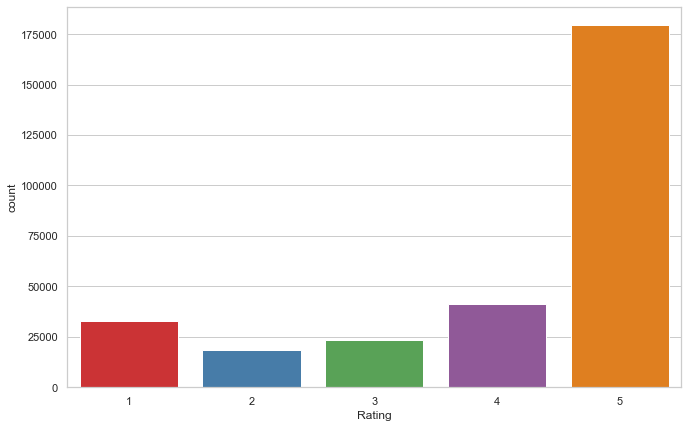

In [ ]:
dfNuevo = dfNuevo.groupby(['Rating','ID_user']).count()
dfNuevo = dfNuevo.reset_index()
dfNuevo['Rating'].value_counts()
sns.countplot(x='Rating', data=dfNuevo, palette='Set1')
plt.show()

## 4. Determina cuál es el sentimiento predominante de cada comentario. ¿Cuál es la distribución del sentimiento en todo el data set?

In [ ]:
Comments_df

,ID_row,ID_product,ID_user,User_alias,Num_useful_users,Rating,Timestamp,Title_review,Text_review,Reg_Time,Weekday,daytime
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011-04-27T00:00:00+00:00,Wednesday,00
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012-09-07T00:00:00+00:00,Friday,00
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,2008-08-18T00:00:00+00:00,Monday,00
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,2011-06-13T00:00:00+00:00,Monday,00
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,2012-10-21T00:00:00+00:00,Sunday,00
...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,2011-03-09T00:00:00+00:00,Wednesday,00
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,2012-03-09T00:00:00+00:00,Friday,00
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",2012-02-21T00:00:00+00:00,Tuesday,00
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,2012-03-13T00:00:00+00:00,Tuesday,00


In [ ]:
def Clean(Text_1):
    #Eliminación de caracteres especiales
    wordsClean = re.sub(r"[-()\[\]\’#/@;:<>{}`+=~|.!?',]", "", Text_1.lower())

    #Tokenización de las palabras.
    words = nltk.word_tokenize(wordsClean.lower())
    #print('Total de palabras:', len(words))
    stop = stopwords.words('english')
    word_tokens = [word for word in words if word.lower() not in stop]
    return word_tokens

In [ ]:
Comments_df['Words'] = Comments_df['Text_review'].apply(Clean)

KeyboardInterrupt: 

In [ ]:
Comments_df.to_csv('Comments_df_Expand.csv', index=False)

In [ ]:
Comments_df = pd.read_csv (r'Comments_df_Expand.csv')

In [ ]:
train_data = Comments_df.copy()

Para el primer análisis se realizará el procesamiento e identificación de sentimiento mediante la librería testblob.

In [ ]:
#!pip install textblob
#!pip install vaderSentiment

In [ ]:
from textblob import TextBlob
texto = "I like this phone. screen quality and camera clarity is really good."
texto2 = "This tv is not good. Bad quality, no clarity, worst experience"
blob = TextBlob(texto2)
blob.sentiment

Sentiment(polarity=-0.6833333333333332, subjectivity=0.7555555555555555)

In [ ]:
def textblob_sentiment(text):
    blob = TextBlob(text)
    if ((blob.sentiment.polarity > 0) and (blob.sentiment.subjectivity > 0)):
        return "Positive"
    #Definir el caso de neutralidad.
    #elif (((blob.sentiment.polarity > 0) and (blob.sentiment.subjectivity > 0)))
    else:
        return "Negative"

In [ ]:
train_data['textblob_sentiment'] = train_data['Text_review'].apply(textblob_sentiment)

,ID_row,ID_product,ID_user,User_alias,Num_useful_users,Rating,Timestamp,Title_review,Text_review,Reg_Time,Weekday,daytime,Words,textblob_sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011-04-27T00:00:00+00:00,Wednesday,0,"['bought', 'several', 'vitality', 'canned', 'd...",Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012-09-07T00:00:00+00:00,Friday,0,"['product', 'arrived', 'labeled', 'jumbo', 'sa...",Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,2008-08-18T00:00:00+00:00,Monday,0,"['confection', 'around', 'centuries', 'light',...",Positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,2011-06-13T00:00:00+00:00,Monday,0,"['looking', 'secret', 'ingredient', 'robitussi...",Positive
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,2012-10-21T00:00:00+00:00,Sunday,0,"['great', 'taffy', 'great', 'price', 'wide', '...",Positive


In [ ]:
train_data.head(5)

,ID_row,ID_product,ID_user,User_alias,Num_useful_users,Rating,Timestamp,Title_review,Text_review,Reg_Time,Weekday,daytime,Words,textblob_sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011-04-27T00:00:00+00:00,Wednesday,0,"['bought', 'several', 'vitality', 'canned', 'd...",Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012-09-07T00:00:00+00:00,Friday,0,"['product', 'arrived', 'labeled', 'jumbo', 'sa...",Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,2008-08-18T00:00:00+00:00,Monday,0,"['confection', 'around', 'centuries', 'light',...",Positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,2011-06-13T00:00:00+00:00,Monday,0,"['looking', 'secret', 'ingredient', 'robitussi...",Positive
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,2012-10-21T00:00:00+00:00,Sunday,0,"['great', 'taffy', 'great', 'price', 'wide', '...",Positive


Cantidad de comentarios por tipo de sentimiento
Positive    501994
Negative     66460
Name: textblob_sentiment, dtype: int64


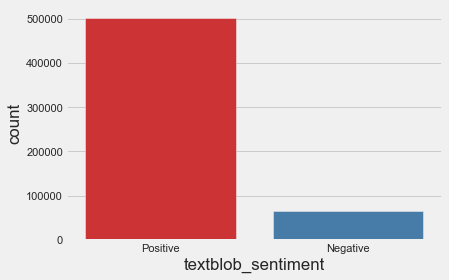

In [ ]:
print('Cantidad de comentarios por tipo de sentimiento')
print(train_data['textblob_sentiment'].value_counts())
textblob_sentiment_Pos = train_data['textblob_sentiment'].value_counts().Positive
textblob_sentiment_Neg = train_data['textblob_sentiment'].value_counts().Negative
sns.countplot(x='textblob_sentiment', data=train_data, palette='Set1')
plt.show()

<AxesSubplot:ylabel='textblob_sentiment'>

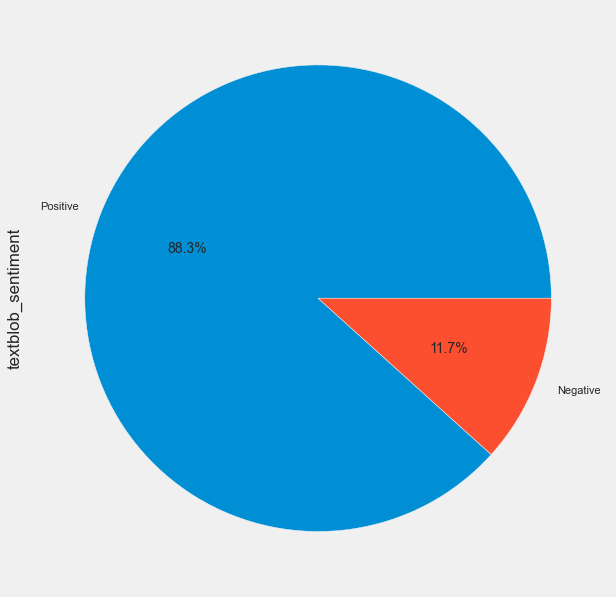

In [ ]:
train_data['textblob_sentiment'].value_counts().plot.pie(y='mass', figsize=(10, 10), autopct='%1.1f%%')

In [ ]:
# Función para obtener el sentimiento
cp = sns.color_palette()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
# Generamos un sentimiento para cada una de las oraciones del dataset, el regreso es una lista
emptyline=[]
for row in train_data['Text_review']:
    #print(row)
    vs = analyzer.polarity_scores(row)
    emptyline.append(vs)
# Se crea un dataframe solo con los sentimientos
df_sentiments = pd.DataFrame(emptyline)
#df_sentiments

In [ ]:
# Mezclamos los sentimientos con el dataset original
df_c = pd.concat([train_data['Text_review'].reset_index(drop=True), df_sentiments], axis=1)

# Convertimos el puntaje en positivo o negativo utilizando algún threshold
df_c['Sentiment'] = np.where(df_c['compound'] >= 0 , 'Positive','Negative')
#df_c.head(5)

In [ ]:
train_data = pd.concat([train_data, df_c['Sentiment']], axis=1)
#train_data

In [ ]:
train_data.head(5)

,ID_row,ID_product,ID_user,User_alias,Num_useful_users,Rating,Timestamp,Title_review,Text_review,Reg_Time,Weekday,daytime,Words,textblob_sentiment,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011-04-27T00:00:00+00:00,Wednesday,0,"['bought', 'several', 'vitality', 'canned', 'd...",Positive,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012-09-07T00:00:00+00:00,Friday,0,"['product', 'arrived', 'labeled', 'jumbo', 'sa...",Negative,Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,2008-08-18T00:00:00+00:00,Monday,0,"['confection', 'around', 'centuries', 'light',...",Positive,Positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,2011-06-13T00:00:00+00:00,Monday,0,"['looking', 'secret', 'ingredient', 'robitussi...",Positive,Positive
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,2012-10-21T00:00:00+00:00,Sunday,0,"['great', 'taffy', 'great', 'price', 'wide', '...",Positive,Positive


In [ ]:
train_data.to_csv('Comments_df_Expand_sentiment.csv', index=False)

In [ ]:
train_data = pd.read_csv (r'Comments_df_Expand_sentiment.csv')
Comments_df = train_data

Cantidad de comentarios por tipo de sentimiento
Positive    511091
Negative     57363
Name: Sentiment, dtype: int64


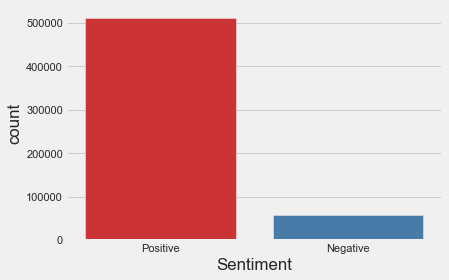

In [ ]:
print('Cantidad de comentarios por tipo de sentimiento')
print(train_data['Sentiment'].value_counts())
Sentiment_Pos = train_data['Sentiment'].value_counts().Positive
Sentiment_Neg = train_data['Sentiment'].value_counts().Negative
sns.countplot(x='Sentiment', data=train_data, palette='Set1')
plt.show()

<AxesSubplot:ylabel='Sentiment'>

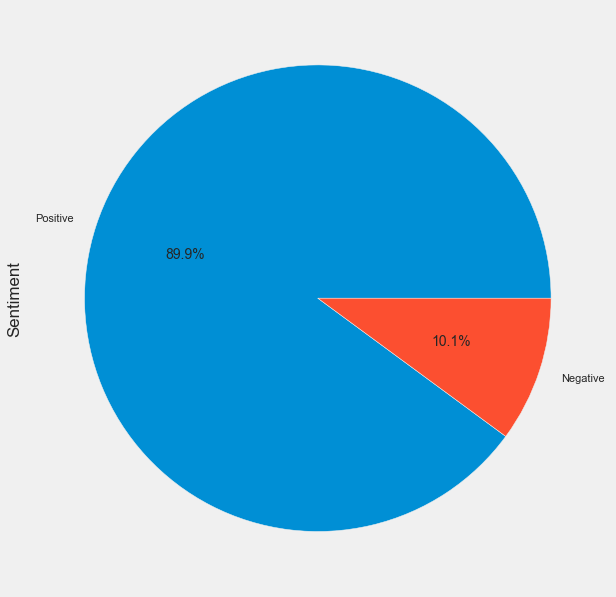

In [ ]:
train_data['Sentiment'].value_counts().plot.pie(y='mass', figsize=(10, 10), autopct='%1.1f%%')

In [ ]:
print("Diferencia de comentarios positivos entre ambos métodos de sentimientos: ", - textblob_sentiment_Pos + Sentiment_Pos)

Diferencia de comentarios positivos entre ambos métodos de sentimientos:  9097


Como se puede apreciar en las gráficas de barras, y a pesar una diferencia de 9097 comentarios. Los resultados son consistentes y se llega a la misma conlcusión. Donde el comentario positivo predomina en el dataset.

## 5. ¿Cuál es el producto qué más recibió opiniones? ¿cuál es el sentimiento predominante en este producto?

In [ ]:
dfNuevo2 = Comments_df[['ID_product', 'Title_review']].copy()
#dfNuevo2

In [ ]:
dfNuevo2 = dfNuevo2.groupby(['ID_product']).count()
#dfNuevo2 = dfNuevo2.reset_index()

In [ ]:
#contador=Comments_df["ID_producto"].value_counts()
#sns.countplot(x='ID_producto', data=contador, palette='Set1')
#plt.show()

In [ ]:
graf = dfNuevo2.sort_values(by=['Title_review'],ascending=False)
graf

,Title_review
ID_product,
B007JFMH8M,913
B002QWP89S,632
B002QWP8H0,632
B002QWHJOU,632
B0026RQTGE,632
...,...
B0029TATL0,1
B0029TJR7M,1
B0029U7OBM,1


<AxesSubplot:xlabel='ID_product'>

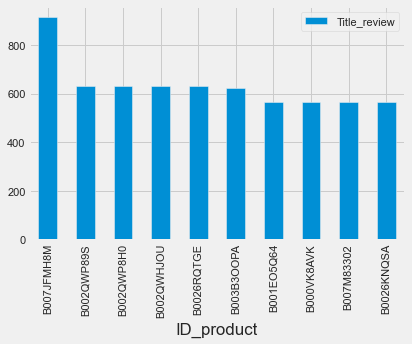

In [ ]:
graf.head(10).plot.bar()

## 6. ¿Qué propones para mejorar aún más las opiniones de este producto?

In [ ]:
Comments_df['Title_review'].where(Comments_df['ID_product']=='B007JFMH8M').value_counts()

Yummy                                          22
Yummy!                                         21
Quaker Soft Baked Oatmeal Cookies              18
Delicious!                                     16
Delicious                                      16
                                               ..
Free Sample-good thing                          1
Delicious soft Baked Oatmeal Raisins cookie     1
Yummy Quaker Oats Soft Baked Cookie             1
YUMM                                            1
sooooo delicious                                1
Name: Title_review, Length: 717, dtype: int64

In [ ]:
Comments_df['Text_review'].where(Comments_df['ID_product']=='B007JFMH8M').value_counts()

These are amazing, soft, and fresh! They taste great and I bought more after I got a free sample from my Mom Vox Box from Influenster~~~ so yummy.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    2
yummy great cookie just like my momma makes this is deffinietely a second best of course after my moms cooking love how soft and chewy they are a must buy                                                                                                                                                                      

Con la tabla anterior se puede ver que existen comentarios repetidos, por lo que implica la existencia de bots.

In [ ]:
Query = Comments_df.query('ID_product == "B007JFMH8M"')
Query = Query[['ID_product', 'Title_review' ,'Text_review','Sentiment']].copy()
Query = Query.reset_index()
Query

,index,ID_product,Title_review,Text_review,Sentiment
0,562970,B007JFMH8M,Delicious!,I love these cookies! Not only are they healt...,Positive
1,562971,B007JFMH8M,Great Anytime of Day!,Quaker Soft Baked Oatmeal Cookies with raisins...,Positive
2,562972,B007JFMH8M,Very good!,I am usually not a huge fan of oatmeal cookies...,Positive
3,562973,B007JFMH8M,Quaker Oats Oatmeal Raisin Mom Voxbox Review C...,I participated in a product review that includ...,Positive
4,562974,B007JFMH8M,"Quick, simple HEALTHY snack for the kiddos!!!",My kids loved these. I was very pleased to giv...,Positive
...,...,...,...,...,...
908,563878,B007JFMH8M,Yummy!,I loved these cookies and so did my kids. You ...,Positive
909,563879,B007JFMH8M,Quaker Soft Baked Cookies,This is a great tasting cookie. It is very sof...,Positive
910,563880,B007JFMH8M,Delicious!,These are great for a quick snack! They are sa...,Positive
911,563881,B007JFMH8M,yummy,I love the Quaker soft baked cookies. The rea...,Positive


In [ ]:
def Create_WC(Words):
    Texto_for_wc = ""
    for i in Words:
        Texto_for_wc += " " + i
    stopwords = set(STOPWORDS)
    Comments_wc = WordCloud(
        background_color='white',
        max_words=274058,
        stopwords=stopwords
    )

    # generate the word cloud
    Comments_wc.generate(Texto_for_wc)
    fig = plt.figure()
    fig.set_figwidth(14) # set width
    fig.set_figheight(18) # set height

    # graficar la nube
    plt.imshow(Comments_wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

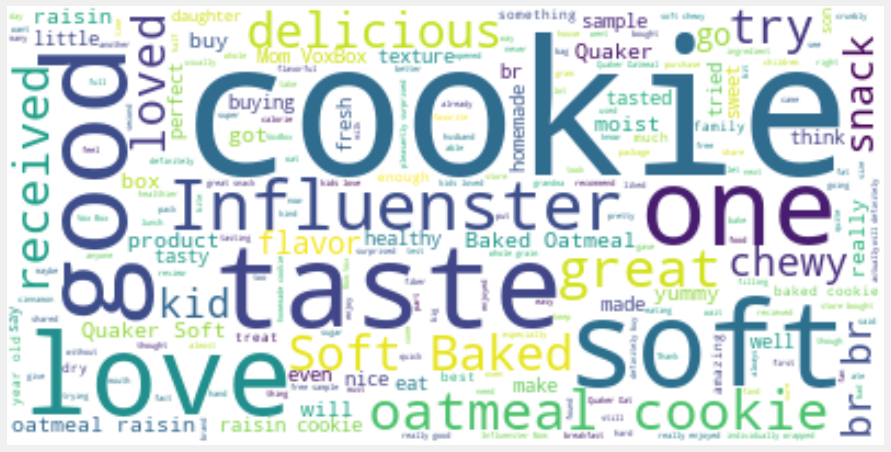

In [ ]:
Create_WC(Query['Text_review'])

Positive    890
Negative     23
Name: Sentiment, dtype: int64

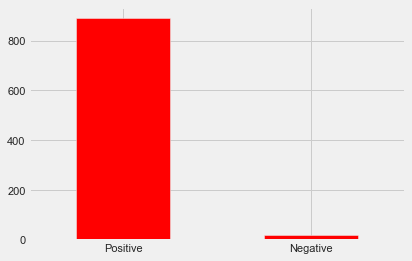

In [ ]:
Resultado6=Query['Sentiment'].value_counts()
Resultado6.plot(kind='bar',rot=0, color='red')
Resultado6

In [ ]:
Resultado6

Positive    890
Negative     23
Name: Sentiment, dtype: int64

<AxesSubplot:ylabel='Sentiment'>

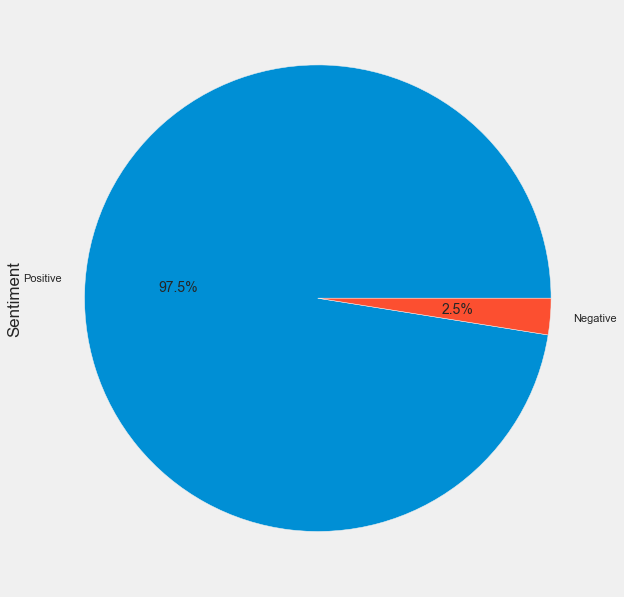

In [ ]:
Resultado6.plot.pie(y='mass', figsize=(10, 10), autopct='%1.1f%%')

In [ ]:
Query2 = Query.query('Sentiment == "Negative"')
Query2 = Query2.reset_index()
Query2

,level_0,index,ID_product,Title_review,Text_review,Sentiment
0,41,563011,B007JFMH8M,My kids loved them.,My kids will devour these cookies. They must b...,Negative
1,79,563049,B007JFMH8M,Quaker Soft Baked Oatmeal Cookies are yummy,I received a Quaker Soft Baked Oatmeal cookie ...,Negative
2,109,563079,B007JFMH8M,Yum!,"The box says, ""soft baked oatmeal cookies"" and...",Negative
3,121,563091,B007JFMH8M,Soft and chewey,This cookie was very moist but it did not crum...,Negative
4,287,563257,B007JFMH8M,Really good for a packaged cookie,The cookie was soft and not over bearingly swe...,Negative
5,329,563299,B007JFMH8M,VERY TASTY!!,I love oatmeal cookies!So I decided to try the...,Negative
6,348,563318,B007JFMH8M,delicious,"A delicious little snack, can also substitute ...",Negative
7,424,563394,B007JFMH8M,Fantastic Cookie,"This cookie was great. It was a little soft, b...",Negative
8,435,563405,B007JFMH8M,"Not so chewy, a bit dry",Maybe it was the hot weather? Maybe it was the...,Negative
9,436,563406,B007JFMH8M,Eh?,These cookies come individually wrapped and ea...,Negative


In [ ]:
for i in Query2['Text_review']:
    print(i)
    print("")

My kids will devour these cookies. They must be super good because believe it or not my kids are picky cookie eaters. I do not like raisins personally so I haven't tried them myself. My only negative thing I can think of is that they are very crumby because they are soft, so with kids it gets quite messy.

I received a Quaker Soft Baked Oatmeal cookie in my Mom Voxbox from Influenster, and it was a big hit.  Soft, chewy, and tasty.  Only thing I would change about it is that it doesn't travel very well because it gets too crumbly.

The box says, "soft baked oatmeal cookies" and that is exactly what you get!  The cookies are individually packed, which makes it easy to grab for lunches, or to throw in a purse or backback for "on the go" kids.  The cookies are fairly good sized, and packed with raisins.  I was concerned about an aftertaste that I have sometimes noticed with cookies that are pre-packaged (maybe a preservative that is often used?) but I did not notice any funny taste or sme

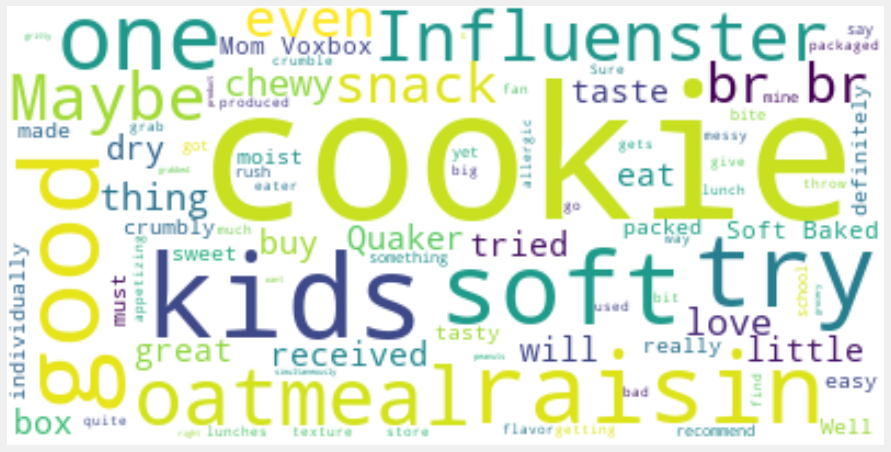

In [ ]:
Create_WC(Query2['Text_review'])

## 7. ¿Existe algún usuario que opina con frecuencia? ¿cuál es el sentimiento predominante de sus opiniones?

In [ ]:
UsuriCom = train_data.groupby("ID_user").agg(frequency=("Title_review","count"))
UsuriCom = UsuriCom.sort_values(by="frequency",ascending=False)

In [ ]:
UsuriCom

,frequency
ID_user,
A3OXHLG6DIBRW8,448
A1YUL9PCJR3JTY,421
AY12DBB0U420B,389
A281NPSIMI1C2R,365
A1Z54EM24Y40LL,256
...,...
A2HRSUTNPGUU3G,1
A2HRSXYDMXMAFN,1
A3TJPSWY2HE4BS,0


Positive    433
Negative     15
Name: Sentiment, dtype: int64

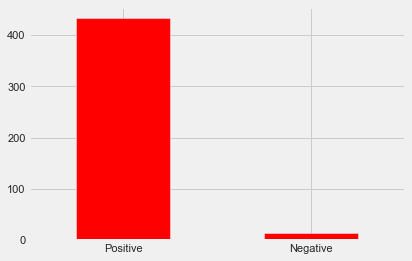

In [ ]:
#Para el usuario que opina con mas frecuencia
Resultado7=train_data['Sentiment'].where(train_data['ID_user']=='A3OXHLG6DIBRW8').value_counts()
Resultado7.plot(kind='bar',rot=0, color='red')
Resultado7

<AxesSubplot:ylabel='Sentiment'>

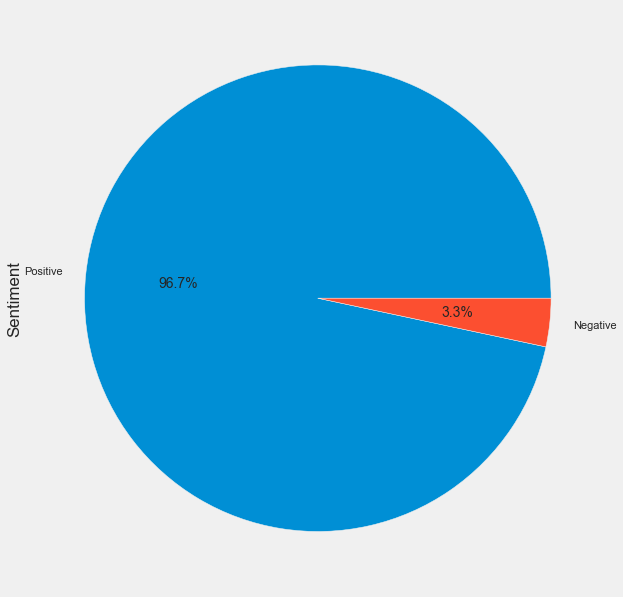

In [ ]:
Resultado7.plot.pie(y='mass', figsize=(10, 10), autopct='%1.1f%%')

## 8. Construye un set de categorías y asocia cada comentario a determina categoría.

In [ ]:
text = ["The movie was very scary and long.", "The Movie was not scary,","The movie was good"]
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(text)
features = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=features)
df

,and,good,long,movie,not,scary,the,very,was
0,0.464997,0.00000,0.464997,0.274634,0.000000,0.353642,0.274634,0.464997,0.274634
1,0.000000,0.00000,0.000000,0.364544,0.617227,0.469417,0.364544,0.000000,0.364544
2,0.000000,0.69903,0.000000,0.412859,0.000000,0.000000,0.412859,0.000000,0.412859


In [ ]:
dfText

0     My kids will devour these cookies. They must b...
1     I received a Quaker Soft Baked Oatmeal cookie ...
2     The box says, "soft baked oatmeal cookies" and...
3     This cookie was very moist but it did not crum...
4     The cookie was soft and not over bearingly swe...
5     I love oatmeal cookies!So I decided to try the...
6     A delicious little snack, can also substitute ...
7     This cookie was great. It was a little soft, b...
8     Maybe it was the hot weather? Maybe it was the...
9     These cookies come individually wrapped and ea...
10    I recieve sample of this cookie from Influenst...
11    I did not love the taste or texture of this co...
12    I was desperate for something to eat but had t...
13    I really never loved raisin oatmeal cookies bu...
14    i received my Cookie my 1st Influenster VoxBox...
15    I received this from Influenster in the Mom Vo...
16    I tried one: gave it two bites (to be sure) an...
17    I got these in the Mom VoxBox from Influen

In [ ]:
!pip install wmi

In [ ]:
import wmi
comp = wmi.WMI()

for i in comp.Win32_ComputerSystem():
   print(i.TotalPhysicalMemory, "bytes of physical memory")

for os in comp.Win32_OperatingSystem():
   print(os.FreePhysicalMemory, "bytes of available memory")

17124990976 bytes of physical memory
6778132 bytes of available memory


In [ ]:
dfText = Comments_df['Text_review'].to_numpy()
np.float32(dfText)

ValueError: could not convert string to float: 'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [ ]:
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

#dfText = pd.DataFrame(text, columns=["texto"])
dfText = Comments_df['Text_review']
stop = stopwords.words('english')

def limpia(j):
    return re.sub(r"[-()\[\]\"#/@;:<>{}`+=~|.!?,]", "",j)

dfText = dfText.str.lower()
dfText = dfText.apply(limpia)
#dfText = dfText.to_numpy()
dfText['texto_sin_stopwords'] = dfText.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(dfText['texto_sin_stopwords'].head(5))
features = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
#print(vectorizer.vocabulary_)
#print(vectorizer.idf_)
df = pd.DataFrame(denselist, columns=features)
df

,actually,addition,appreciates,around,arrived,assortment,beer,believe,better,bought,...,taffy,tiny,treat,unsalted,vendor,vitality,wardrobe,wide,witch,yummy
0,0.000000,0.000000,0.200379,0.000000,0.000000,0.000000,0.000000,0.000000,0.400758,0.200379,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.200379,0.000000,0.000000,0.000000,0.000000
1,0.220307,0.000000,0.000000,0.000000,0.220307,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.220307,0.220307,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.148005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.296009,0.296009,0.000000,0.000000,0.000000,0.148005,0.000000,0.296009,0.119409
3,0.000000,0.240411,0.000000,0.000000,0.000000,0.000000,0.240411,0.240411,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.220055,0.000000,0.000000,0.000000,0.000000,...,0.660164,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220055,0.000000,0.177539


In [ ]:
def remueve_html(frase):
    cleanr = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    cleantext = re.sub(cleanr, '', frase)
    return cleantext

In [ ]:
import re

TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

text = re.sub('<[^>]*>', '', datapoint["Text"])

In [ ]:
df

In [ ]:
train_data['Text_review'][0]

In [ ]:
#dfText = pd.DataFrame(text, columns=["texto"])
dfText = Query2['Text_review']
stop = stopwords.words('english')

def limpia(j):
    return re.sub(r"[-()\[\]\"#/@;:<>{}`+=~|.!?,]", "",j)

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(train_data['Words'].head(5))
features = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
#print(vectorizer.vocabulary_)
#print(vectorizer.idf_)
df = pd.DataFrame(denselist, columns=features)
#df

In [ ]:
Top = 3
Category = pd.DataFrame()
def Get_Category_words_TOP(Top,Panda):
    Panda = Panda.T.sort_index(axis=1, ascending=True)
    Arr_words = []
    shape = Panda.shape
    Panda = Panda.reset_index()
    #print(shape[1]-1)
    for j in range(shape[1]):
        #print(j,'-------')
        Panda = Panda.reset_index()
        Panda.drop('level_0', axis=1, inplace=True)
        Panda.sort_values(by=[j],inplace=True, ascending=False)
        Panda = Panda.reset_index()
        Panda.drop('level_0', axis=1, inplace=True)
        for i in range (Top):
            Arr_words.append(Panda['index'][i])
        Category[j] = [Arr_words]
        Arr_words = []
    return Category

In [ ]:
Category_Words = Get_Category_words_TOP(Top,df)
Category_Words

,0,1,2,3,4
0,"[better, product, meat]","[jumbo, product, small]","[witch, tiny, treat]","[soda, medicinal, root]","[taffy, great, assortment]"


In [ ]:
Category_Words.T

,0
0,"[better, product, meat]"
1,"[jumbo, product, small]"
2,"[witch, tiny, treat]"
3,"[soda, medicinal, root]"
4,"[taffy, great, assortment]"


In [ ]:
text = []
for i in train_data["Text_review"].head(10):
    text.append([i])
text

[['I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'],
 ['Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".'],
 ['This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis\' "The Lion, The Witch, and The Wardrobe" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.'],
 ['If you are lo

In [ ]:
#!pip install gensim
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import gensim
from gensim import corpora
#text = ["I am learning NLP, it is very interesting and exciting. it includes machine learning and deep learning",
#"My father is a data scientist and he is nlp expert",
#"My sister has good exposure into android development"]
#Limpiar y preprocesarlo
df = pd.DataFrame(text, columns=["texto"])
df['texto'] = df['texto'].str.lower()
def limpia(j):
    return re.sub(r"[-()\[\]\"#/@;:<>{}`+=~|.!?,]", "",j)
df['texto'] = df['texto'].apply(limpia)

In [ ]:
#Elimino stopwords
stop = set(stopwords.words('english'))
df['texto_sin_stopwords'] = df['texto'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df['texto_sin_stopwords']

0    bought several vitality canned dog food produc...
1    product arrived labeled jumbo salted peanutsth...
2    confection around centuries light pillowy citr...
3    looking secret ingredient robitussin believe f...
4    great taffy great price wide assortment yummy ...
5    got wild hair taffy ordered five pound bag taf...
6    saltwater taffy great flavors soft chewy candy...
7    taffy good soft chewy flavors amazing would de...
8    right i'm mostly sprouting cats eat grass love...
9    healthy dog food good digestion also good smal...
Name: texto_sin_stopwords, dtype: object

In [ ]:
#Coloco el texto ahora en una lista de lista de palabras para construir mas facil el dictionary
lista = df["texto_sin_stopwords"].apply(lambda x: x.split(' '))
lista

0    [bought, several, vitality, canned, dog, food,...
1    [product, arrived, labeled, jumbo, salted, pea...
2    [confection, around, centuries, light, pillowy...
3    [looking, secret, ingredient, robitussin, beli...
4    [great, taffy, great, price, wide, assortment,...
5    [got, wild, hair, taffy, ordered, five, pound,...
6    [saltwater, taffy, great, flavors, soft, chewy...
7    [taffy, good, soft, chewy, flavors, amazing, w...
8    [right, i'm, mostly, sprouting, cats, eat, gra...
9    [healthy, dog, food, good, digestion, also, go...
Name: texto_sin_stopwords, dtype: object

In [ ]:
#Coloco el texto ahora en una lista de lista de palabras para construir mas facil el dictionary
lista = df["texto_sin_stopwords"].apply(lambda x: x.split(' '))
lista

In [ ]:
#Coloco el texto ahora en una lista de lista de palabras para construir mas facil el dictionary
lista = train_data["Words"].apply(lambda x: x.split(' '))
lista

0         [['bought',, 'several',, 'vitality',, 'canned'...
1         [['product',, 'arrived',, 'labeled',, 'jumbo',...
2         [['confection',, 'around',, 'centuries',, 'lig...
3         [['looking',, 'secret',, 'ingredient',, 'robit...
4         [['great',, 'taffy',, 'great',, 'price',, 'wid...
                                ...                        
568449    [['great',, 'sesame',, 'chickenthis',, 'good',...
568450    [['im',, 'disappointed',, 'flavor',, 'chocolat...
568451    [['stars',, 'small',, 'give',, '1015',, 'one',...
568452    [['best',, 'treats',, 'training',, 'rewarding'...
568453    [['satisfied',, 'product',, 'advertised',, 'us...
Name: Words, Length: 568454, dtype: object

In [ ]:
#Uso la función dictionary para acomodar los elementos en key-value y ordenar cada texto en orden alfabético
dictionary = corpora.Dictionary(lista)
#for k, v in dictionary.items():
#    print(k, v)

In [ ]:
dictionary = corpora.Dictionary(lista)
#El doc2bow ejecuta un Bag of words, la salida será de cada palabra cuantas veces aparece en la oracion
doc_term_matrix = [dictionary.doc2bow(doc) for doc in lista]
#doc_term_matrix

In [ ]:
lda = gensim.models.ldamodel.LdaModel
# Running and Training LDA model on the document term matrix for 3 topics.
ldamodel = lda(doc_term_matrix, num_topics=5, id2word = dictionary, passes=3)
#print(ldamodel.print_topics())
topics = ldamodel.print_topics(num_words=3)
for topic in topics:
    print(topic)

(0, '0.017*"\'like\'," + 0.014*"\'taste\'," + 0.013*"\'good\',"')
(1, '0.015*"\'amazon\'," + 0.013*"\'product\'," + 0.012*"\'price\',"')
(2, '0.023*"\'food\'," + 0.012*"\'dog\'," + 0.010*"\'like\',"')
(3, '0.029*"\'coffee\'," + 0.025*"\'tea\'," + 0.018*"\'like\',"')
(4, '0.072*"\'br\'," + 0.042*""\'\'"," + 0.031*"\'``\',"')


In [ ]:
Pedro = [sorted(ldamodel[x], key=lambda x : (x[1]), reverse=True)[0] for x in doc_term_matrix]
Pedro

[(2, 0.96584433),
 (1, 0.4922401),
 (0, 0.5766074),
 (3, 0.64570755),
 (0, 0.51175344),
 (3, 0.40508384),
 (0, 0.5309726),
 (0, 0.7404418),
 (2, 0.60598236),
 (2, 0.94914764),
 (0, 0.3042572),
 (2, 0.82606673),
 (2, 0.93454266),
 (1, 0.5347741),
 (2, 0.4368812),
 (1, 0.5366609),
 (2, 0.55000365),
 (1, 0.90989107),
 (4, 0.43454093),
 (1, 0.93747693),
 (1, 0.8664347),
 (1, 0.4274122),
 (1, 0.82490104),
 (0, 0.9088484),
 (1, 0.6022504),
 (4, 0.6392937),
 (0, 0.592903),
 (1, 0.952424),
 (0, 0.6997469),
 (0, 0.3042563),
 (3, 0.73400027),
 (1, 0.59738433),
 (0, 0.73203635),
 (0, 0.8436959),
 (0, 0.7810687),
 (0, 0.7298844),
 (0, 0.40251422),
 (0, 0.61743176),
 (3, 0.4922287),
 (0, 0.344156),
 (0, 0.49535602),
 (0, 0.7049032),
 (1, 0.5991849),
 (0, 0.9567542),
 (0, 0.73761797),
 (0, 0.59507006),
 (0, 0.7912712),
 (0, 0.89572537),
 (0, 0.9213401),
 (0, 0.49574962),
 (0, 0.92671835),
 (1, 0.36695063),
 (4, 0.28144217),
 (0, 0.4366132),
 (3, 0.78446877),
 (3, 0.5491472),
 (1, 0.7729723),
 (0, 0.

In [ ]:
Category_num = pd.DataFrame.from_records(Pedro, columns = ['Category', 'Percentage'])
Category_num

,Category,Percentage
0,2,0.965844
1,1,0.492240
2,0,0.576607
3,3,0.645708
4,0,0.511753
...,...,...
568449,0,0.735757
568450,3,0.474871
568451,2,0.780572
568452,2,0.626010


In [ ]:
train_data = pd.concat([train_data, Category_num], axis=1)
train_data.head(5)

,ID_row,ID_product,ID_user,User_alias,Num_useful_users,Rating,Timestamp,Title_review,Text_review,Reg_Time,Weekday,daytime,Words,textblob_sentiment,Sentiment,Category,Percentage,Category,Percentage
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011-04-27T00:00:00+00:00,Wednesday,0,"['bought', 'several', 'vitality', 'canned', 'd...",Positive,Positive,2,0.965844,2,0.965844
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012-09-07T00:00:00+00:00,Friday,0,"['product', 'arrived', 'labeled', 'jumbo', 'sa...",Negative,Negative,1,0.492240,1,0.492240
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,2008-08-18T00:00:00+00:00,Monday,0,"['confection', 'around', 'centuries', 'light',...",Positive,Positive,0,0.576607,0,0.576607
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,2011-06-13T00:00:00+00:00,Monday,0,"['looking', 'secret', 'ingredient', 'robitussi...",Positive,Positive,3,0.645708,3,0.645708
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,2012-10-21T00:00:00+00:00,Sunday,0,"['great', 'taffy', 'great', 'price', 'wide', '...",Positive,Positive,0,0.511753,0,0.511753


In [ ]:
train_data.to_csv('Comments_df_Expand_sentiment_category.csv', index=False)

## 9. ¿Cuáles son las categorías más comúnes a las que pertenecen los comentarios que tienen un rating de 5?

## 10. ¿Cuáles son las categorías más comúnes a las que pertenecen los comentarios que tienen un rating de 1?